# [E-02] Diabetes Data

## (1) 데이터 가져오기

### Import

In [2748]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 데이터 load

In [2749]:
diabetes = load_diabetes() # 당뇨병 환자 데이터

### 데이터 확인

In [2750]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [2751]:
print(diabetes.data)
print(diabetes.target)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [2752]:
print(diabetes.feature_names)
print(diabetes.DESCR)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides lev

In [2753]:
df_X = diabetes.data
df_y = diabetes.target
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


## (2) 모델에 입력할 데이터 X 준비하기

In [2754]:
df_X = np.array(df_X)
type(df_X)

numpy.ndarray

## (3) 모델에 예측할 데이터 y 준비하기

In [2755]:
df_y = np.array(df_y)
type(df_y)

numpy.ndarray

In [2756]:
# df_y = df_y.reshape(-1, 1)

# colums = diabetes.feature_names
# colums.append('Target')

# data = np.concatenate([df_X, df_y], axis = 1)
# df_t = pd.DataFrame(data, columns = colums)
# print(df_t)

df_y = df_y.reshape(-1, 1) 처럼 reshape 해준 이유:  
  
ValueError: all the input arrays must have same number of dimensions  
but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)  
: concatenate 함수(ndarray의 결합)을 할 때 차원 배열의 개수가 달라 오류가 난것을 확인했으며  
차원배열의 개수를 맞추기 위해 reshape를 진행  
  

(차원배열의 개수의 문제가 아닌 컴퓨터프로그래밍은 공백이 아닌 정확한 차원수를 입력해줘야함)  
  
[사이킷런 (scikit-learn,sklearn, diabetes)](https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes)  
[[python] Numpy배열 ndarray를 결합시키는 방법](https://engineer-mole.tistory.com/234)

### 위 코드의 주석 이유

df_y를 reshape 를 다르게 진행하다보니 아래의 계산식들이 행렬 모양이 안맞아서 진행이 되질 않았으며  
dataFrame 에 대해서도 concatenate 로 묶어서 진행했으나 df_t는 전혀 사용하지 않고 있어  
전체 주석처리를 진행함 (concatenate를 위해 df_y를 reshape 했었으며 reshape 한 부분 때문에 계산식이 성립 안됨)  
  
[2022-11-09 , 22시 웅제퍼실님의 피드백 내용]

## (4) train 데이터와 test 데이터로 분리하기

In [2757]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 77)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(353, 10) (89, 10)
(353,) (89,)


## (5) 모델 준비하기

In [2758]:
x = X_train
y = y_train
w = np.random.rand(10)
b = np.random.rand()

def model(x, w, b):
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * w[i]
    predictions += b
    return predictions

10개의 class 값으로 Target의 예측값을 구해야하므로  
가중치인 w의 갯수는 10개가 필요하며 for 문을 통해  
각 class의 입력값 * class별 가중치(random) + 편향값(random)을 구하여  
전부 합산하여 Target에 대한 예측값을 구하는 모델

## (6) 손실함수 loss 정의하기

### 손실함수를 MSE 함수로 정의

In [2759]:
def mse(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [2760]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    l = mse(predictions, y)
    return l

## (7) 기울기를 구하는 gradient 함수 구현하기

In [2761]:
def gradient(x, w, b, y):
    n = len(w) # 가중치의 개수
    y_pred = model(x, w, b) # 예측값
    dw = 1/n * 2 * x.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dw, db

# gradient(X_train, w, b, y_train)
# print('dw : {0}'.format(dw))
# print('db : {0}'.format(db))

## (8) 하이퍼 파라미터인 학습률 설정하기

In [2762]:
learning_rate = 0.05
losses = [] # 손실함수 list로 기록

for i in range(1, 1001):
    dw, db = gradient(X_train, w, b, y_train) # train 데이터에 대한 기울기값 구하기
    # print(dw.shape)
    # print(w.shape)
    # w = w.reshape(1, -1)
    # test = learning_rate * dw
    # print(dw.shape)

    w -= learning_rate * dw # 학습률 * 기울기에 따른 가중치값
    b -= learning_rate * db # 학습률 * 기울기에 따른 편향값
    l = loss(X_train, w, b, y_train) # 손실된 값의 데이터
    losses.append(l)
    if i % 10 == 0: # i 값이 10이 될때마다 손실데이터 출력을 위한 if 문
        print('Iteration {0} : Loss {1:.4f}'.format(i, l))

Iteration 10 : Loss 7560.9705
Iteration 20 : Loss 4518.8295
Iteration 30 : Loss 3863.4038
Iteration 40 : Loss 3600.4726
Iteration 50 : Loss 3443.0290
Iteration 60 : Loss 3332.5842
Iteration 70 : Loss 3249.2940
Iteration 80 : Loss 3183.6508
Iteration 90 : Loss 3130.3652
Iteration 100 : Loss 3086.2481
Iteration 110 : Loss 3049.2423
Iteration 120 : Loss 3017.9329
Iteration 130 : Loss 2991.2891
Iteration 140 : Loss 2968.5241
Iteration 150 : Loss 2949.0157
Iteration 160 : Loss 2932.2596
Iteration 170 : Loss 2917.8406
Iteration 180 : Loss 2905.4121
Iteration 190 : Loss 2894.6836
Iteration 200 : Loss 2885.4096
Iteration 210 : Loss 2877.3821
Iteration 220 : Loss 2870.4247
Iteration 230 : Loss 2864.3870
Iteration 240 : Loss 2859.1406
Iteration 250 : Loss 2854.5762
Iteration 260 : Loss 2850.5999
Iteration 270 : Loss 2847.1316
Iteration 280 : Loss 2844.1024
Iteration 290 : Loss 2841.4533
Iteration 300 : Loss 2839.1334
Iteration 310 : Loss 2837.0990
Iteration 320 : Loss 2835.3126
Iteration 330 : L

### 시각화

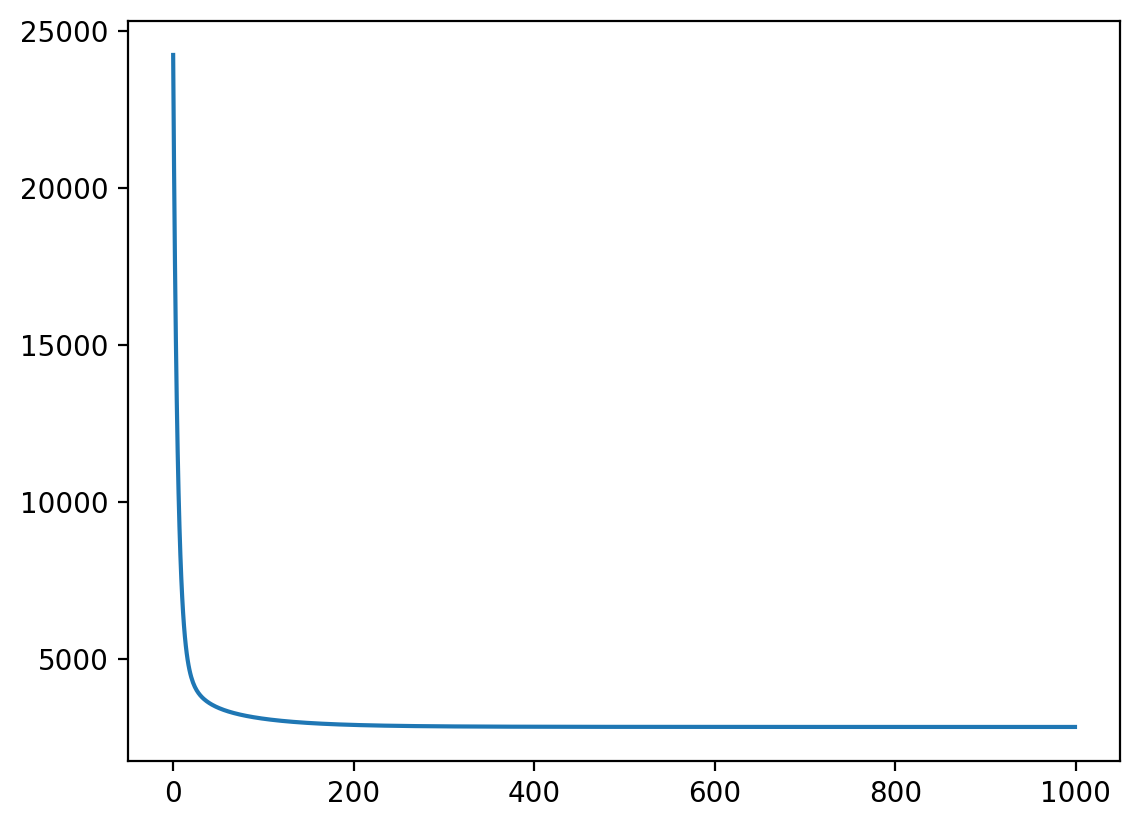

In [2763]:
plt.plot(losses)
plt.show()

## (10) test 데이터에 대한 성능 확인하기

In [2764]:
learning_rate_t = 0.05
losses_t = [] # 손실함수 list로 기록

for i in range(1, 1001):
    dw, db = gradient(X_test, w, b, y_test) # train 데이터에 대한 기울기값 구하기
    # print(dw.shape)
    # print(w.shape)
    # w = w.reshape(1, -1)
    # test = learning_rate * dw
    # print(dw.shape)

    w -= learning_rate * dw # 학습률 * 기울기에 따른 가중치값
    b -= learning_rate * db # 학습률 * 기울기에 따른 편향값
    l = loss(X_test, w, b, y_test) # 손실된 값의 데이터
    losses_t.append(l)
    if i % 10 == 0: # i 값이 10이 될때마다 손실데이터 출력을 위한 if 문
        print('Iteration {0} : Loss {1:.4f}'.format(i, l))

Iteration 10 : Loss 3135.5827
Iteration 20 : Loss 3115.4478
Iteration 30 : Loss 3100.1773
Iteration 40 : Loss 3086.8410
Iteration 50 : Loss 3074.9212
Iteration 60 : Loss 3064.2131
Iteration 70 : Loss 3054.5676
Iteration 80 : Loss 3045.8582
Iteration 90 : Loss 3037.9746
Iteration 100 : Loss 3030.8208
Iteration 110 : Loss 3024.3123
Iteration 120 : Loss 3018.3756
Iteration 130 : Loss 3012.9461
Iteration 140 : Loss 3007.9673
Iteration 150 : Loss 3003.3896
Iteration 160 : Loss 2999.1696
Iteration 170 : Loss 2995.2689
Iteration 180 : Loss 2991.6541
Iteration 190 : Loss 2988.2956
Iteration 200 : Loss 2985.1674
Iteration 210 : Loss 2982.2467
Iteration 220 : Loss 2979.5132
Iteration 230 : Loss 2976.9490
Iteration 240 : Loss 2974.5384
Iteration 250 : Loss 2972.2673
Iteration 260 : Loss 2970.1234
Iteration 270 : Loss 2968.0956
Iteration 280 : Loss 2966.1741
Iteration 290 : Loss 2964.3502
Iteration 300 : Loss 2962.6161
Iteration 310 : Loss 2960.9647
Iteration 320 : Loss 2959.3899
Iteration 330 : L

In [2765]:
prediction = model(X_test, w, b)
mse = loss(X_test, w, b, y_test)

## (11) 정답 데이터와 예측한 데이터 시각화하기

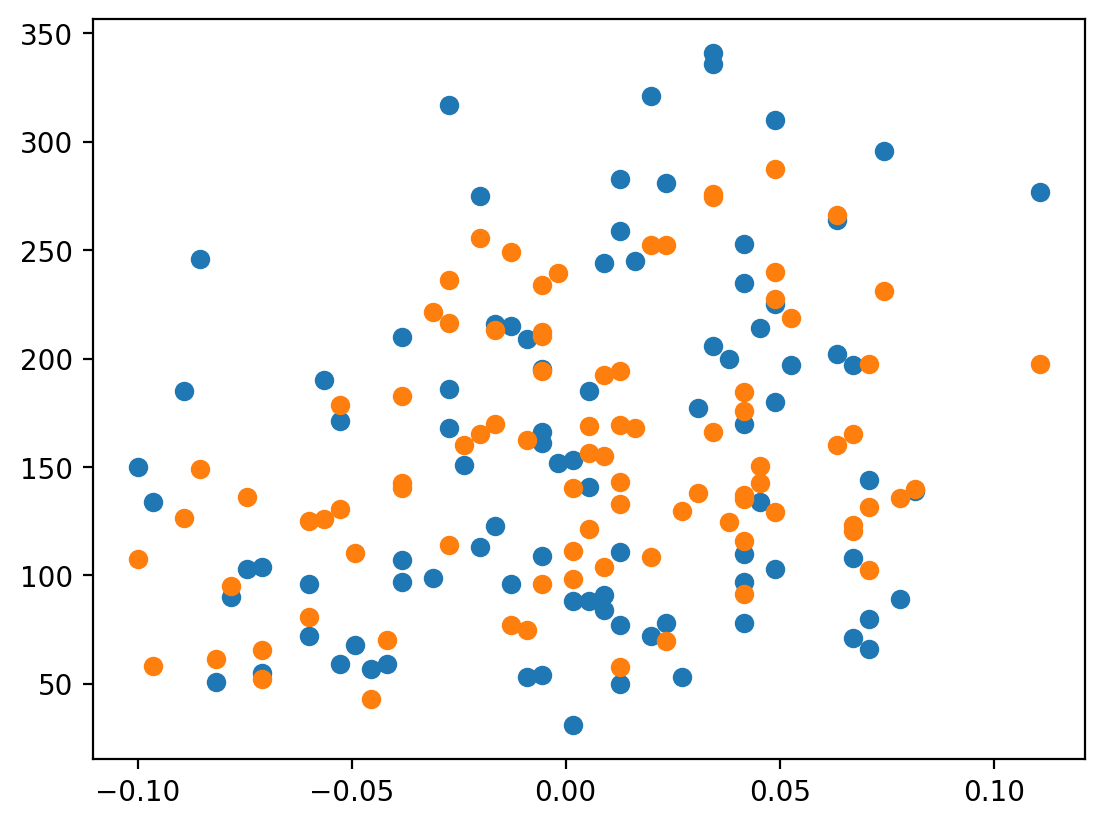

In [2766]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# [E-2] 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

In [2767]:
train_path = os.getenv('homepath') + '/Desktop/python/exploration_11_04/train.csv'
train = pd.read_csv(train_path)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2768]:
print(train.columns)
train.info()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [2769]:
train.shape

(10886, 12)

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [2770]:
train['datetime64'] = pd.to_datetime(train['datetime'], format = '%Y-%m-%d %H:%M:%S', errors = 'raise')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime64
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [2771]:
train['years'] = train['datetime64'].dt.year
train['month'] = train['datetime64'].dt.month
train['day'] = train['datetime64'].dt.day
train['hour'] = train['datetime64'].dt.hour
train['minute'] = train['datetime64'].dt.minute
train['second'] = train['datetime64'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  datetime64  10886 non-null  datetime64[ns]
 13  years       10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  hour        10886 non-

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

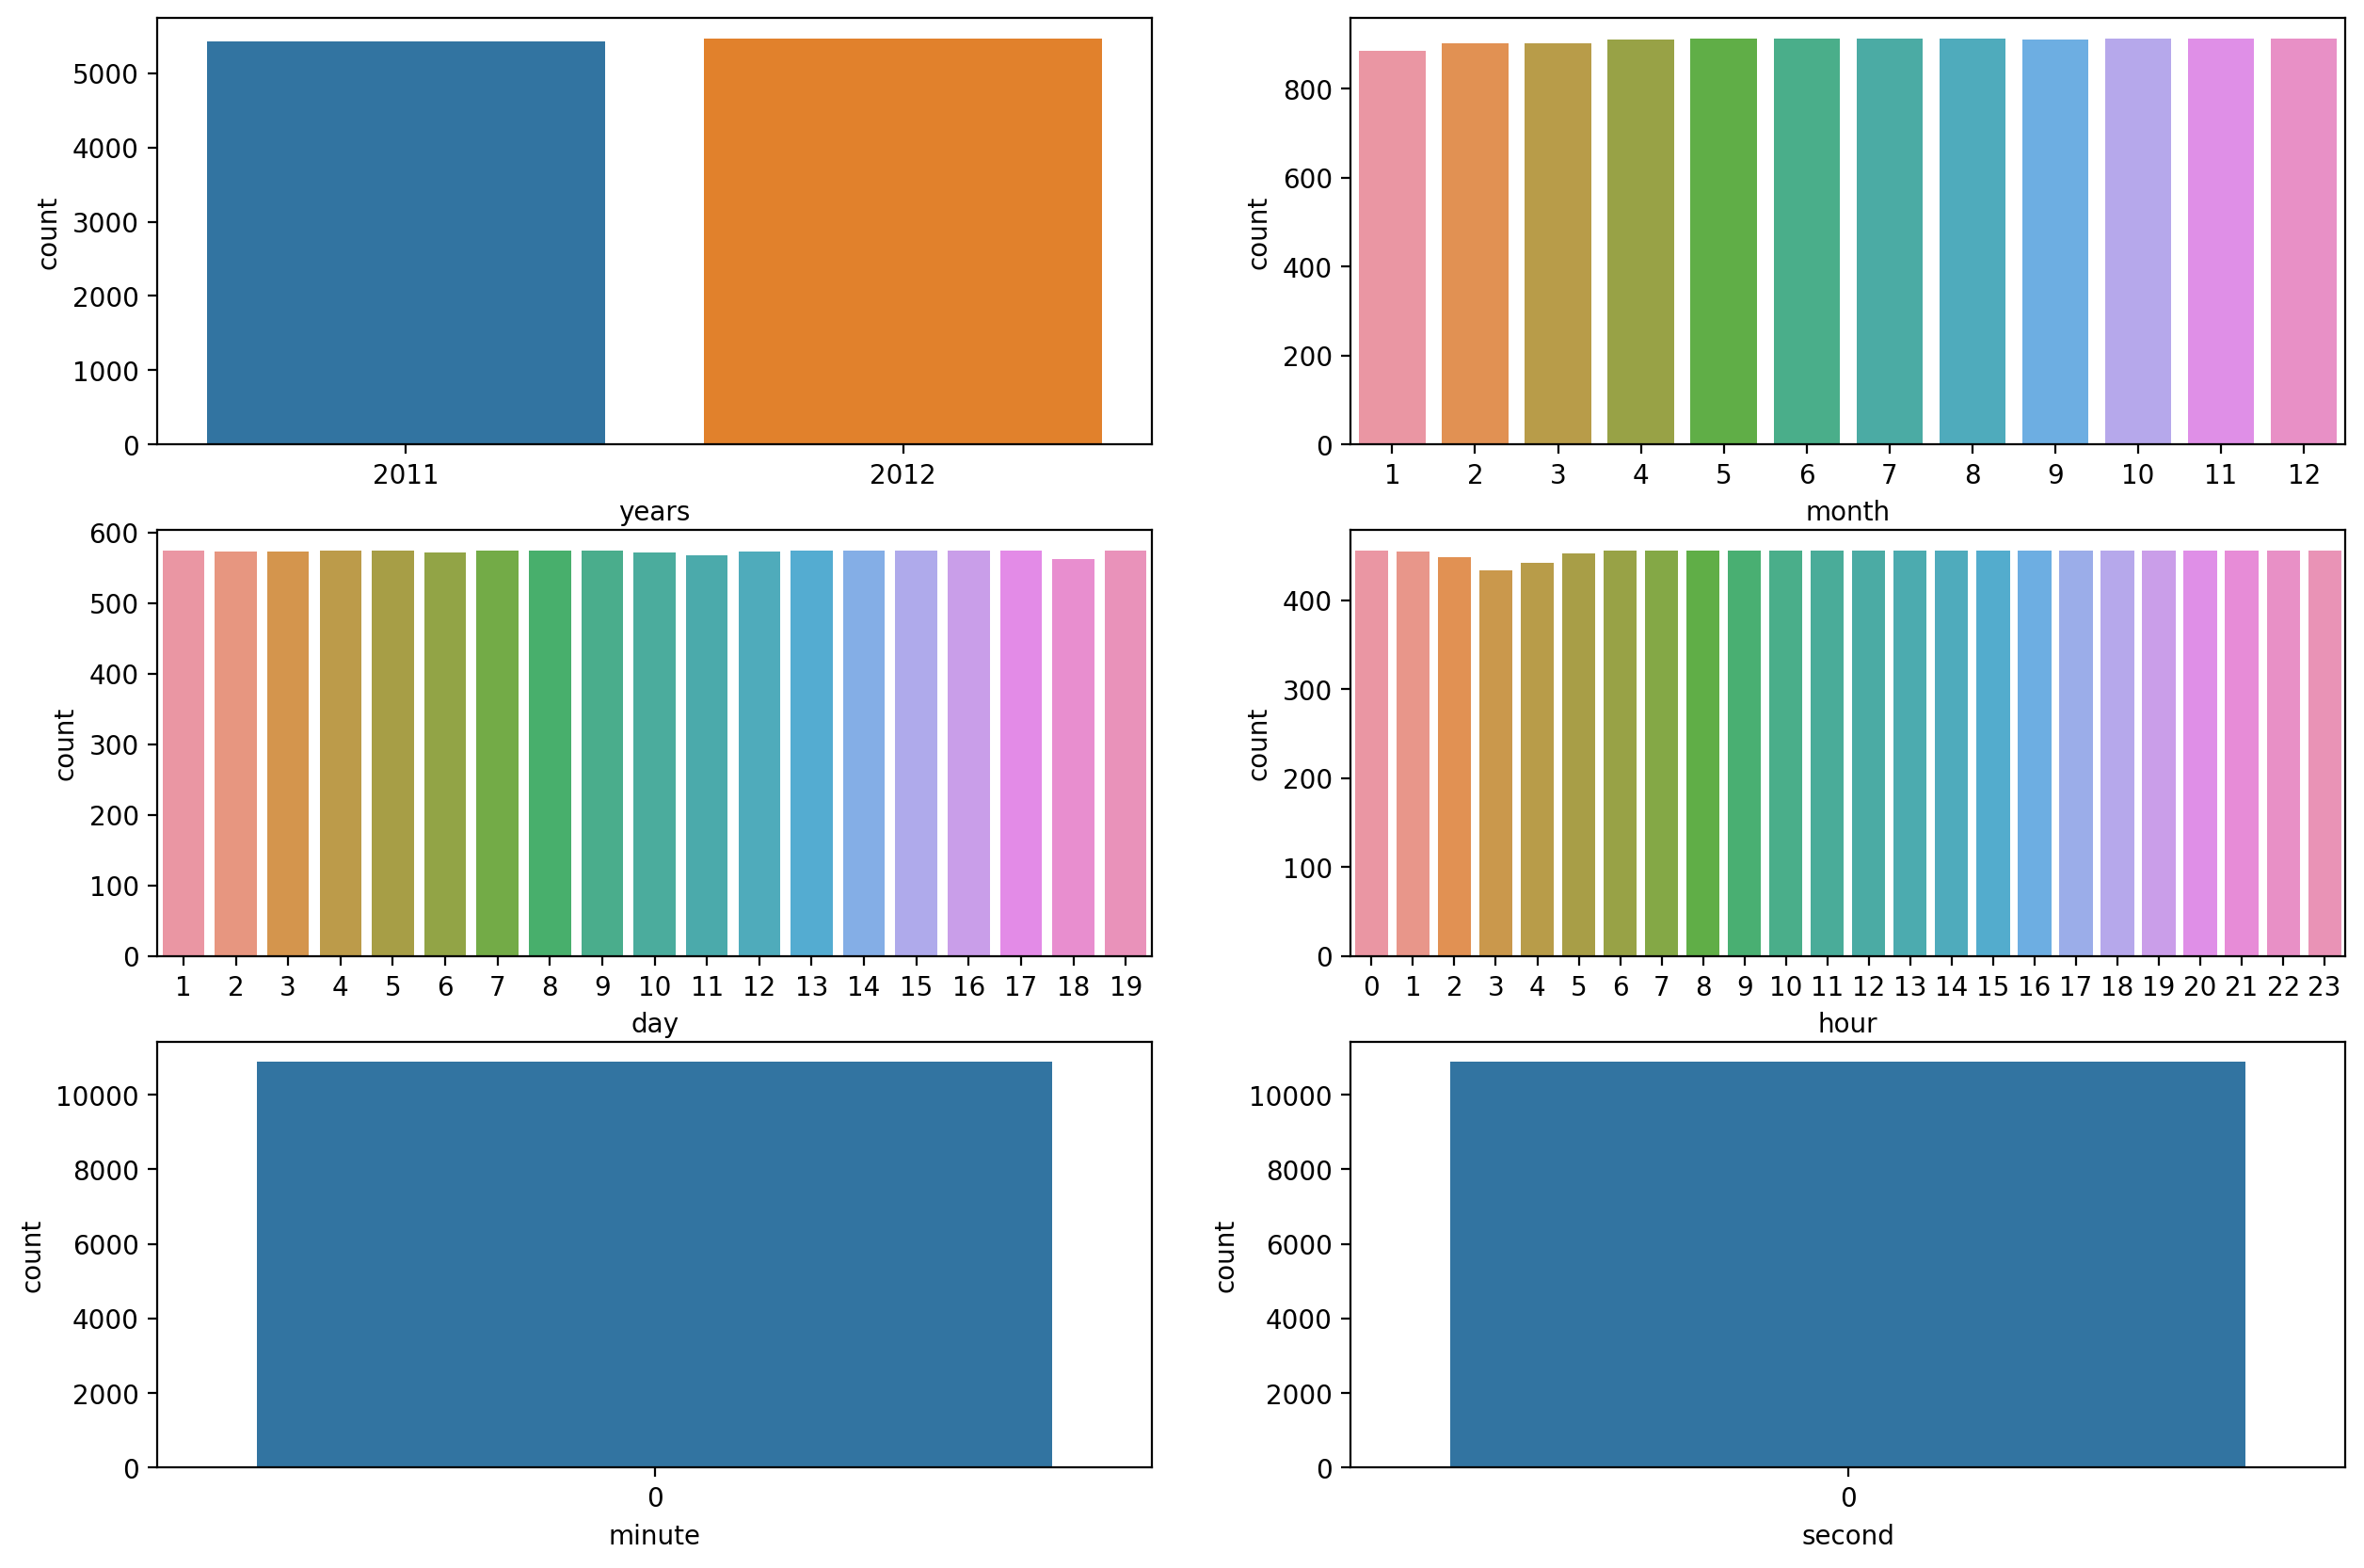

In [2772]:
colums = ['years', 'month', 'day', 'hour', 'minute', 'second'] # 6개의 칼럼

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols =2)
figure.set_size_inches(15,10)

sns.countplot(x = 'years', data = train, ax = ax1)
sns.countplot(x = 'month', data = train, ax = ax2)
sns.countplot(x = 'day', data = train, ax = ax3)
sns.countplot(x = 'hour', data = train, ax = ax4)
sns.countplot(x = 'minute', data = train, ax = ax5)
sns.countplot(x = 'second', data = train, ax = ax6)

plt.show()

## 참고문헌 Reference  

[사이킷런 (scikit-learn,sklearn, diabetes)](https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes)  
[[python] Numpy배열 ndarray를 결합시키는 방법](https://engineer-mole.tistory.com/234)  
[4.2 선형회귀분석의 기초](https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html)  
Aiffel Exploration_2번 LMS 노드  
  

pandas datetime extract year month day 키워드로 검색해 보기:  
[Pandas Datetime to Date 부분(월, 연도 등)](https://datagy.io/pandas-extract-date-from-datetime/)  
  
[[시간 데이터 다루기] to_datetime활용하기](https://sarah0518.tistory.com/61)  
[Seaborn을 사용한 데이터 분포 시각화](https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)  

Aiffel Fundamentals_14번 LMS 노드  
